# Project Title: ***Air Quality Analysis and Prediction***
**The problem statement**:-
Air pollution is a significant environmental concern affecting public health, climate, and ecosystems. Monitoring and predicting air quality is essential for taking preventive measures. This project aims to analyze air quality trends across various Indian cities using historical data and develop a machine learning model to predict the Air Quality Index (AQI) based on pollutant levels.

frist flow i am undastanding the dataset

## Understand the data

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/city_day (1).csv')
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
df.shape

(29531, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
print(df.isnull().sum())

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


# Visualization

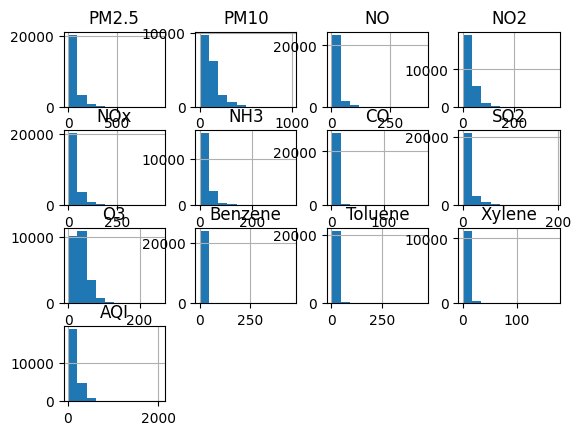

In [ ]:
df.hist()
plt.show()

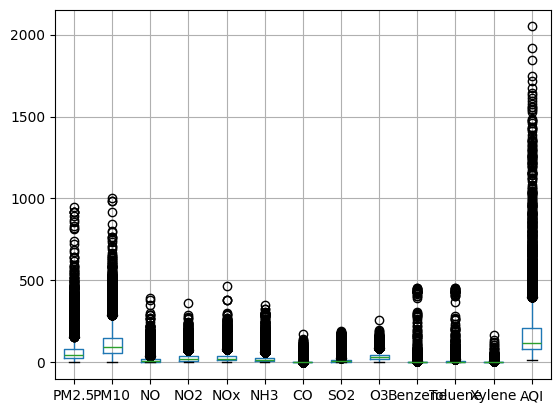

In [ ]:
df.boxplot()
plt.show()

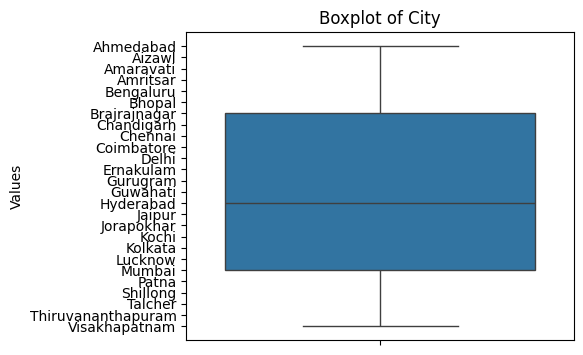

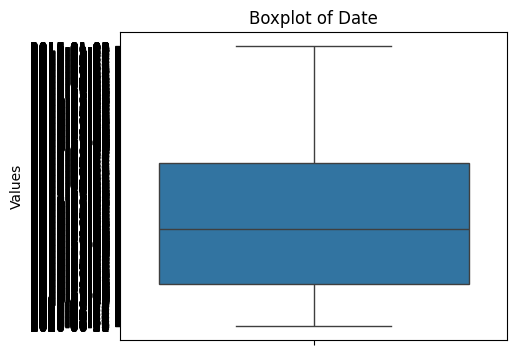

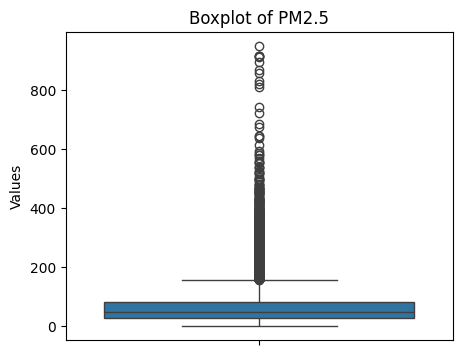

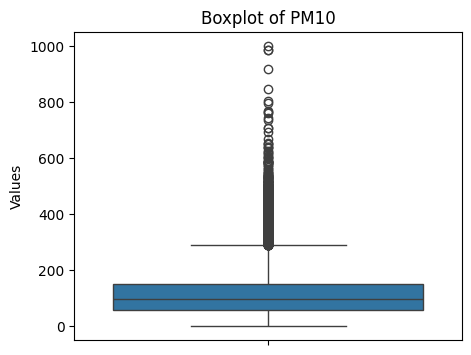

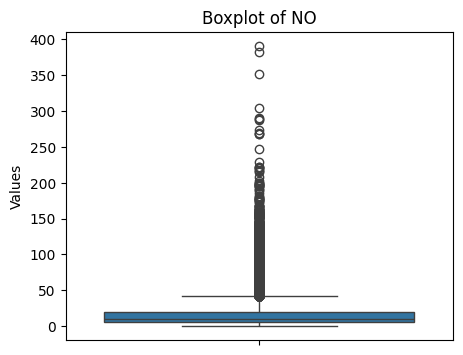

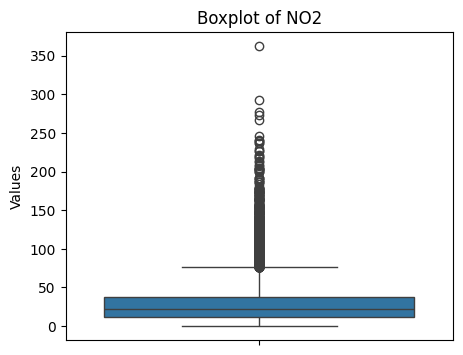

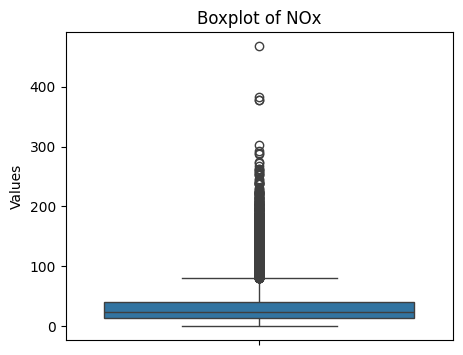

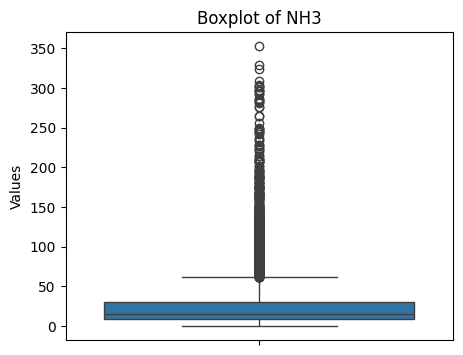

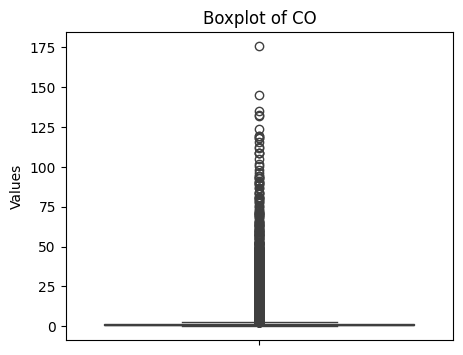

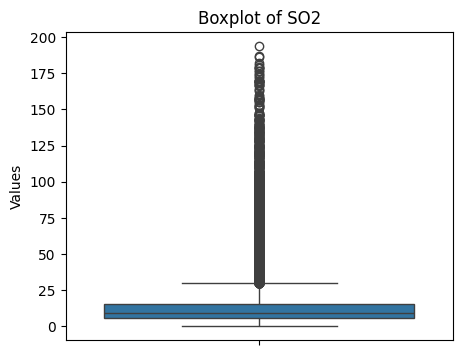

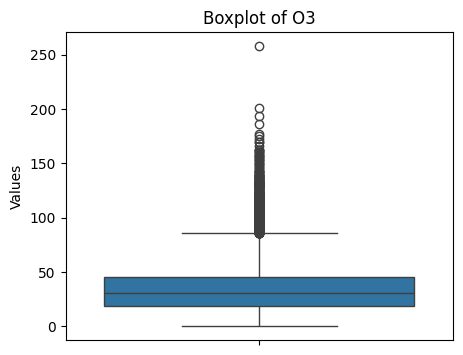

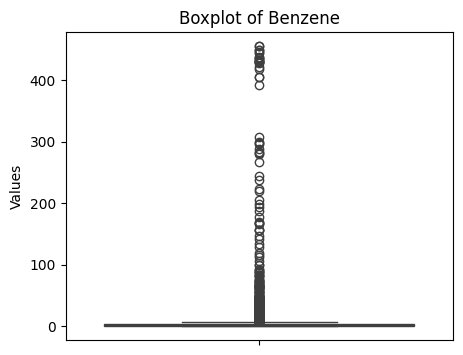

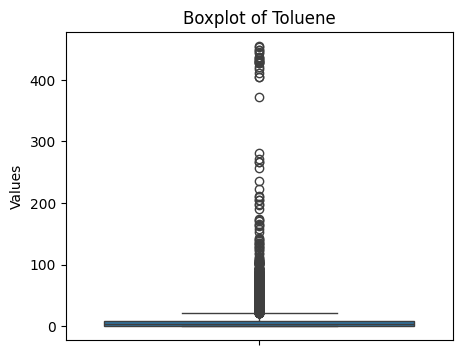

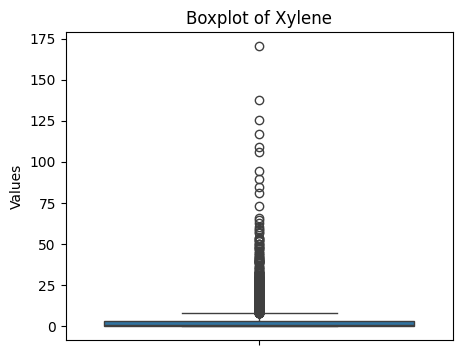

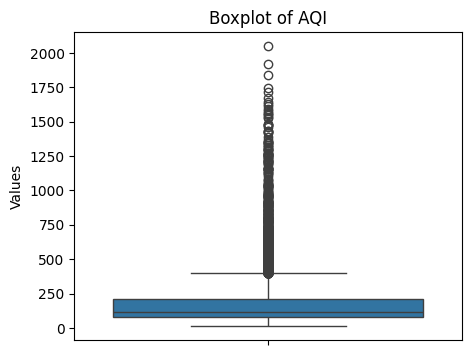

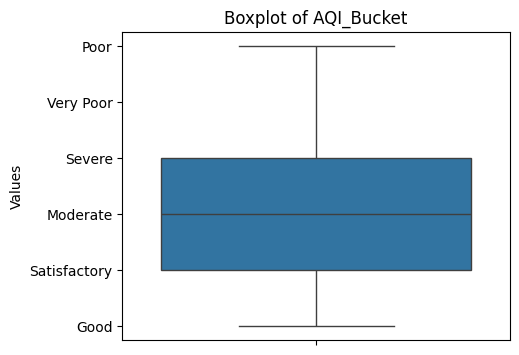

In [ ]:
for col in df.columns:
  fig,ax=plt.subplots(figsize=(5,4))
  sns.boxplot(y=df[col],ax=ax)
  plt.title(f"Boxplot of {col}")
  plt.ylabel('Values')
  plt.show()

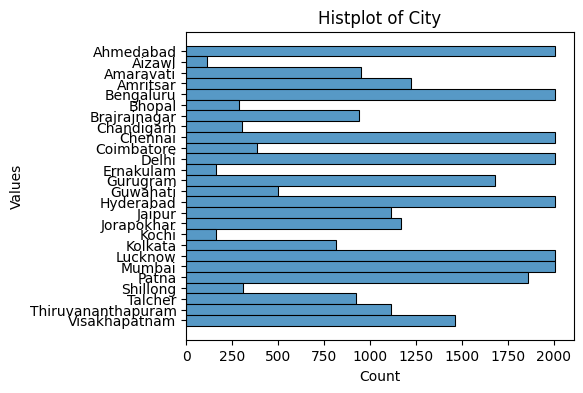

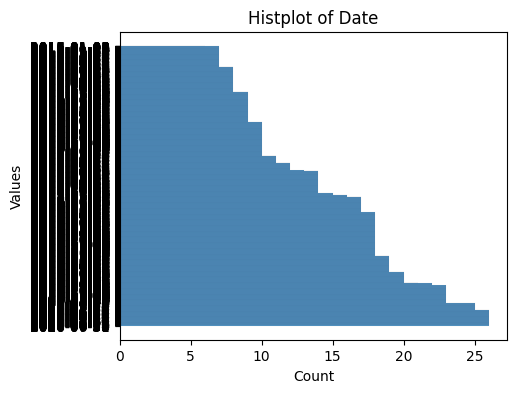

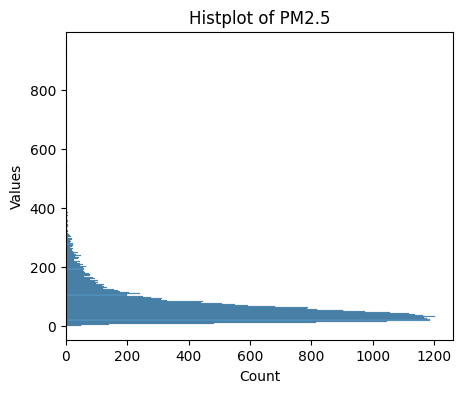

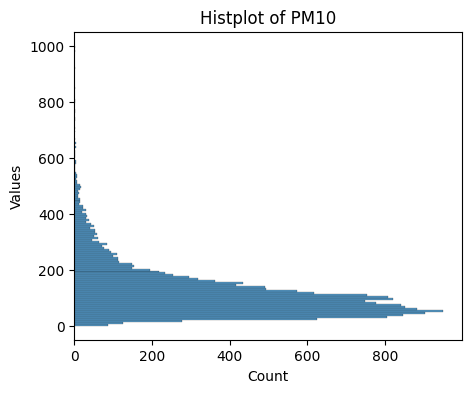

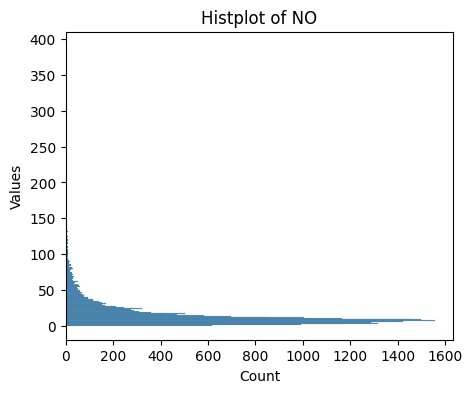

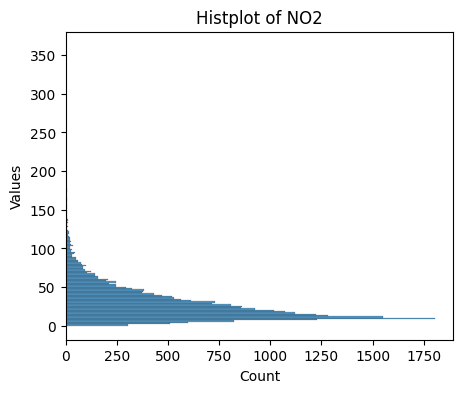

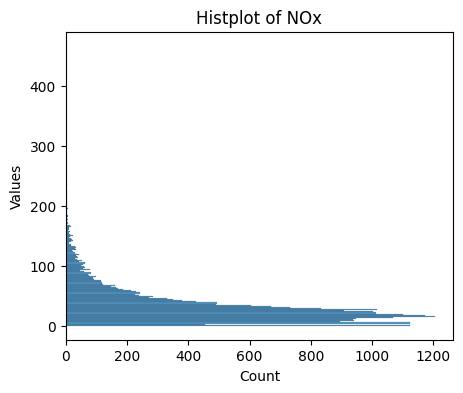

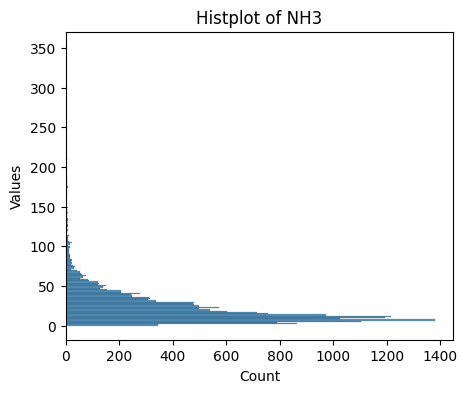

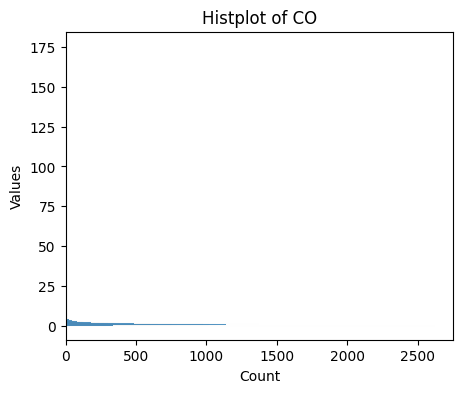

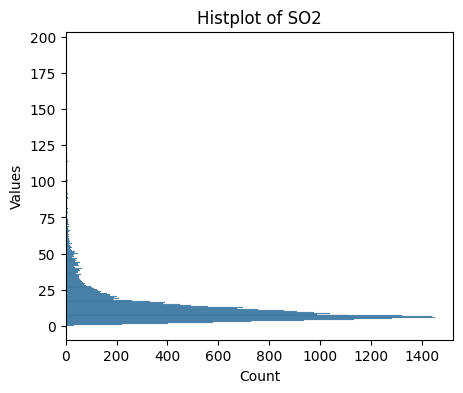

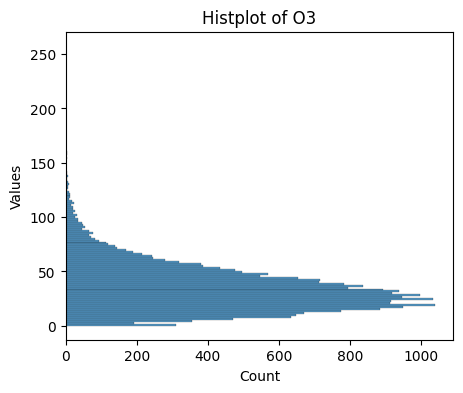

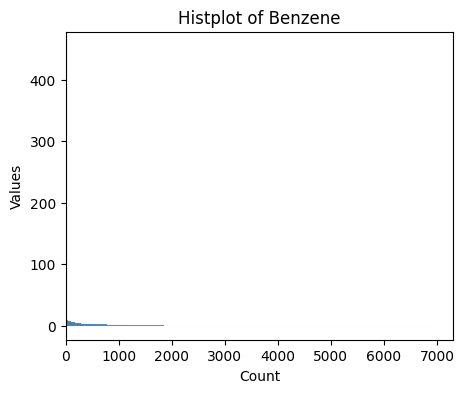

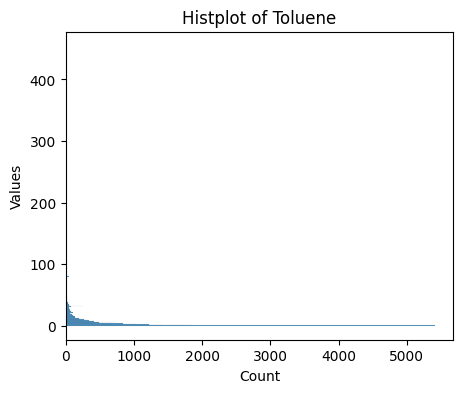

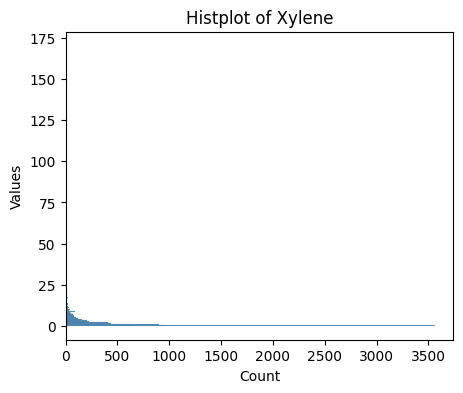

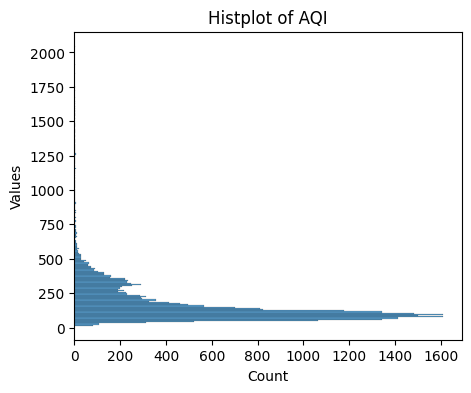

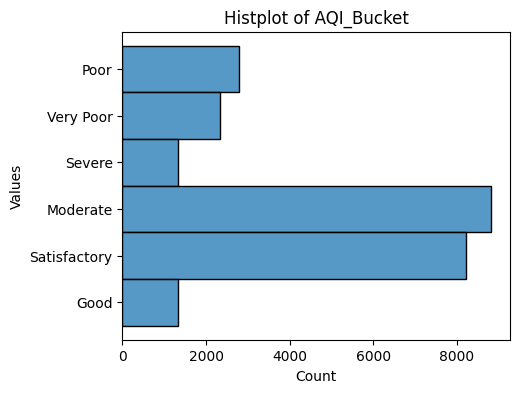

In [ ]:
for col in df.columns:
  fig,ax=plt.subplots(figsize=(5,4))
  sns.histplot(y=df[col],ax=ax)
  plt.title(f"Histplot of {col}")
  plt.ylabel('Values')
  plt.show()

In [ ]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['City']=le.fit_transform(df['City'])

In [ ]:
df['City'] = np.log1p(df['City'])
df['PM2.5'] = np.log1p(df['PM2.5'])
df['PM10'] = np.log1p(df['PM10'])
df['NO'] = np.log1p(df['NO'])
df['NO2'] = np.log1p(df['NO2'])
df['NOx'] = np.log1p(df['NOx'])
df['NH3'] = np.log1p(df['NH3'])
df['CO'] = np.log1p(df['CO'])
df['SO2'] = np.log1p(df['SO2'])
df['O3'] = np.log1p(df['O3'])
df['Benzene'] = np.log1p(df['Benzene'])
df['Toluene'] = np.log1p(df['Toluene'])
df['AQI'] = np.log1p(df['AQI'])

# Data Cleaning

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.drop(columns=['Xylene','AQI_Bucket'],inplace=True)  # Drop Xylene column, drop AQI_Bucket column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   City     29531 non-null  float64       
 1   Date     29531 non-null  datetime64[ns]
 2   PM2.5    24933 non-null  float64       
 3   PM10     18391 non-null  float64       
 4   NO       25949 non-null  float64       
 5   NO2      25946 non-null  float64       
 6   NOx      25346 non-null  float64       
 7   NH3      19203 non-null  float64       
 8   CO       27472 non-null  float64       
 9   SO2      25677 non-null  float64       
 10  O3       25509 non-null  float64       
 11  Benzene  23908 non-null  float64       
 12  Toluene  21490 non-null  float64       
 13  AQI      24850 non-null  float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 3.2 MB


In [ ]:
# filling missing  values

df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
df["PM10"].fillna(df["PM10"].median(),inplace=True)
df["NO"].fillna(df["NO"].median(),inplace=True)
df["NO2"].fillna(df["NO2"].median(),inplace=True)
df["NOx"].fillna(df["NOx"].median(),inplace=True)
df["NH3"].fillna(df["NH3"].median(),inplace=True)
df["CO"].fillna(df["CO"].median(),inplace=True)
df["SO2"].fillna(df["SO2"].median(),inplace=True)
df["O3"].fillna(df["O3"].median(),inplace=True)
df["Benzene"].fillna(df["Benzene"].median(),inplace=True)
df["Toluene"].fillna(df["Toluene"].median(),inplace=True)
df["AQI"].fillna(df["AQI"].median(),inplace=True)

<ipython-input-59-6cc77f38a71f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
<ipython-input-59-6cc77f38a71f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

# Feature Engineering

In [ ]:
# Covert the 'date' column to datetime
df['Date']=pd.to_datetime(df['Date'])

# Extract the year
df['Year']=df['Date'].dt.year

# Extract the month
df['Month']=df['Date'].dt.month

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['Day_Of_Week']=df['Date'].dt.dayofweek

# Dropping previous column
df.drop('Date',axis=1,inplace=True)

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,Day_Of_Week
0,0.000000,3.903386,4.571407,0.652325,2.955951,2.898671,2.824351,0.652325,3.354804,4.900523,0.000000,0.019803,4.779123,2015,1,3
1,0.000000,3.903386,4.571407,0.678034,2.814810,2.859913,2.824351,0.678034,3.240637,3.557061,1.543298,1.871802,4.779123,2015,1,4
2,0.000000,3.903386,4.571407,2.912351,3.010621,3.424263,2.824351,2.912351,3.403528,3.456317,2.054124,2.856470,4.779123,2015,1,5
3,0.000000,3.903386,4.571407,0.993252,2.969388,2.942859,2.824351,0.993252,2.975019,3.613078,1.691939,2.410542,4.779123,2015,1,6
4,0.000000,3.903386,4.571407,3.139833,3.109953,3.657389,2.824351,3.139833,3.697096,3.696600,2.080691,2.990217,4.779123,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,3.258097,2.773838,3.950089,2.161022,3.260402,3.022374,2.600465,0.385262,2.256541,3.190476,1.175573,2.570320,3.737670,2020,6,5
29527,3.258097,3.233961,4.318687,1.486140,3.298057,2.863914,2.564180,0.418710,2.618855,3.438493,0.553885,1.166271,4.262680,2020,6,6
29528,3.258097,3.174297,4.200655,1.492904,3.418710,2.961658,2.460443,0.392042,2.242835,3.464485,0.009950,0.009950,4.234107,2020,6,0
29529,3.258097,2.870169,3.931237,1.619388,3.409827,2.985682,2.400619,0.418710,2.383243,3.377588,0.000000,0.000000,4.007333,2020,6,1


# Correlation

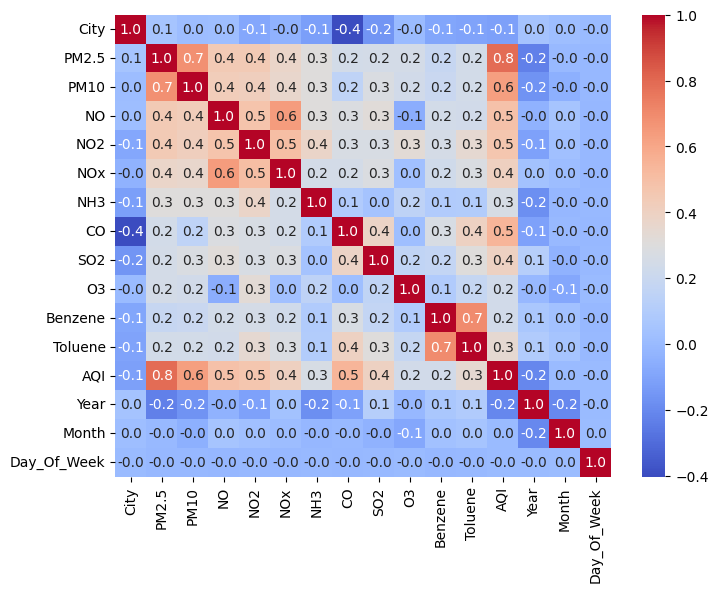

In [ ]:
corr=df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='0.01f')
plt.show()

In [ ]:
s=df.corr()['AQI']
s.sort_values(ascending=False)

,AQI
AQI,1.000000
PM2.5,0.791353
PM10,0.630454
CO,0.542678
NO,0.488596
NO2,0.466398
NOx,0.405340
SO2,0.401969
Toluene,0.347745
NH3,0.262280


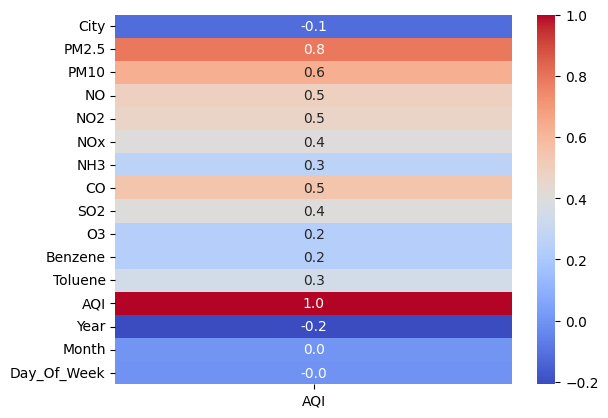

In [ ]:
sns.heatmap(s.to_frame(),annot=True,cmap='coolwarm',fmt='0.01f')
plt.show()

In [ ]:
df.drop('City',axis=1,inplace=True)
df.drop('Year',axis=1,inplace=True)
df.drop('Month',axis=1,inplace=True)
df.drop('O3',axis=1,inplace=True)
df.drop('Benzene',axis=1,inplace=True)
df.drop('Day_Of_Week',axis=1,inplace=True)
df.drop('NH3',axis=1,inplace=True)
df.drop('SO2',axis=1,inplace=True)
df.drop('Toluene',axis=1,inplace=True)

In [ ]:
df

,PM2.5,PM10,NO,NO2,NOx,CO,AQI
0,3.903386,4.571407,0.652325,2.955951,2.898671,0.652325,4.779123
1,3.903386,4.571407,0.678034,2.814810,2.859913,0.678034,4.779123
2,3.903386,4.571407,2.912351,3.010621,3.424263,2.912351,4.779123
3,3.903386,4.571407,0.993252,2.969388,2.942859,0.993252,4.779123
4,3.903386,4.571407,3.139833,3.109953,3.657389,3.139833,4.779123
...,...,...,...,...,...,...,...
29526,2.773838,3.950089,2.161022,3.260402,3.022374,0.385262,3.737670
29527,3.233961,4.318687,1.486140,3.298057,2.863914,0.418710,4.262680
29528,3.174297,4.200655,1.492904,3.418710,2.961658,0.392042,4.234107
29529,2.870169,3.931237,1.619388,3.409827,2.985682,0.418710,4.007333


# Outlier Detection

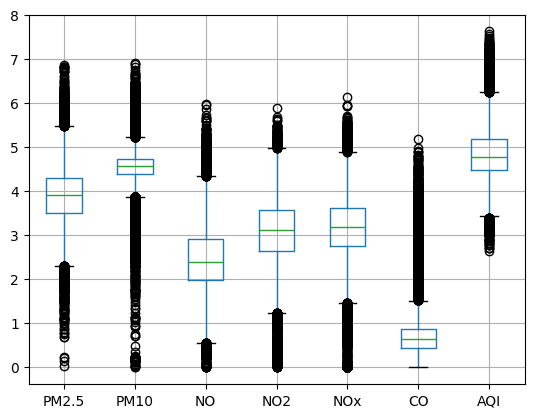

In [ ]:
df.boxplot()
plt.show()

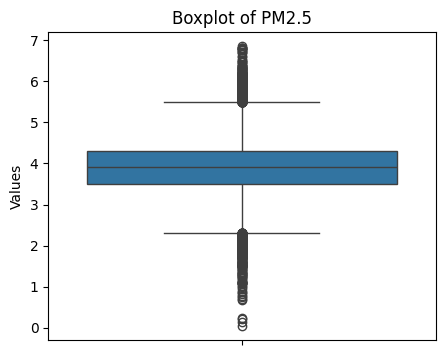

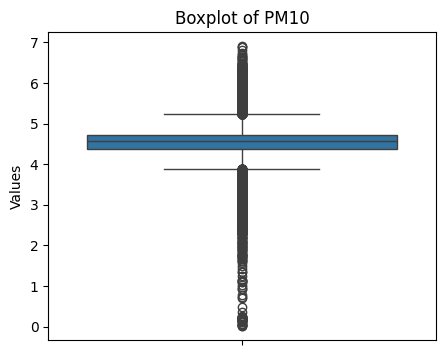

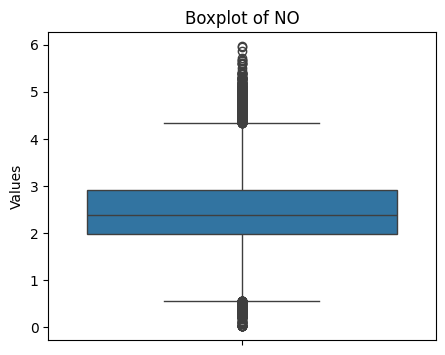

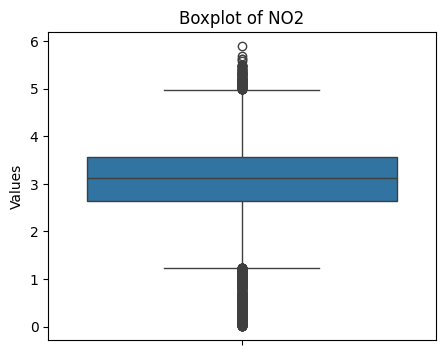

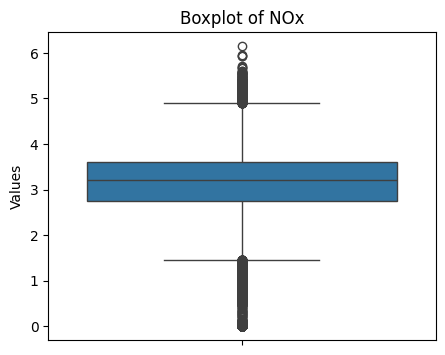

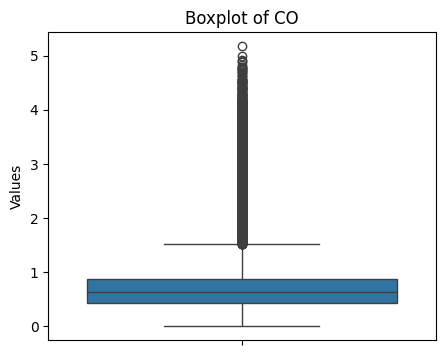

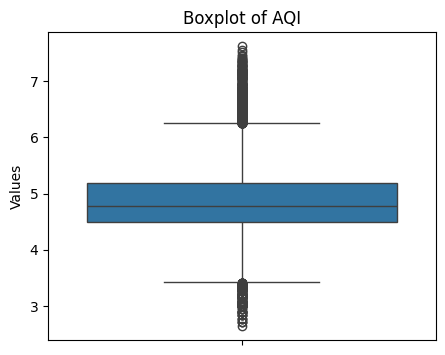

In [ ]:
for col in df.columns:
  fig,ax=plt.subplots(figsize=(5,4))
  sns.boxplot(y=df[col],ax=ax)
  plt.title(f"Boxplot of {col}")
  plt.ylabel('Values')
  plt.show()

# Outlier removing

In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(data, exclude_column):
    for col in data.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='AQI')
df_cleaned

,PM2.5,PM10,NO,NO2,NOx,CO,AQI
3,3.903386,4.571407,0.993252,2.969388,2.942859,0.993252,4.779123
15,3.903386,4.571407,0.966984,3.123246,3.172203,0.966984,4.779123
18,3.903386,4.571407,1.255616,3.327910,3.348148,1.255616,4.779123
23,3.903386,4.571407,1.108563,3.062924,3.109061,1.108563,4.779123
24,3.903386,4.571407,0.883768,3.064792,3.053529,0.883768,4.779123
...,...,...,...,...,...,...,...
29524,2.670694,4.086648,1.193922,3.117950,2.645465,0.343590,4.356709
29526,2.773838,3.950089,2.161022,3.260402,3.022374,0.385262,3.737670
29527,3.233961,4.318687,1.486140,3.298057,2.863914,0.418710,4.262680
29528,3.174297,4.200655,1.492904,3.418710,2.961658,0.392042,4.234107


# Minmax scalar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = df_cleaned.drop('AQI', axis=1)

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(features)

# Create a new DataFrame with the scaled data, using the correct index
scaled_df = pd.DataFrame(scaled_data, columns=features.columns, index=features.index) # Use features.index instead of data.index

# You can now use 'scaled_df' for further analysis or modeling

# Initial Modeling

In [ ]:
X=df[['PM2.5','PM10','NO','NO2','NOx','CO']]
y=df['AQI']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
ypred=model.predict(X_test)

In [ ]:
# from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
# mse=mean_squared_error(y_test,ypred)
# rmse=np.sqrt(mse)
# r2=r2_score(y_test,ypred)
# mae=mean_absolute_error(y_test,ypred)
# print(f'MSE : {mse},RMSE : {rmse},R-Squared : {r2},MAE : {mae}')

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predictions (replace `model` with your trained model)
y_pred = model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

R² Score: 0.780456820863235
Mean Absolute Error (MAE): 0.208786914557602
Mean Squared Error (MSE): 0.08007401882030216
